Instructions for updating:
Colocations handled automatically by placer.


c:\python\python37\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (20, 20), input_shape=(256, 256,...)`


(59, 59, 9)


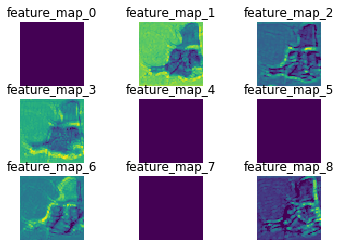

c:\python\python37\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (10, 10), input_shape=(256, 256,...)`


(59, 59, 9)


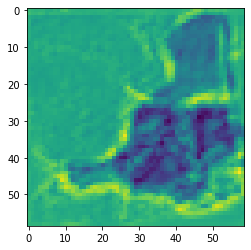

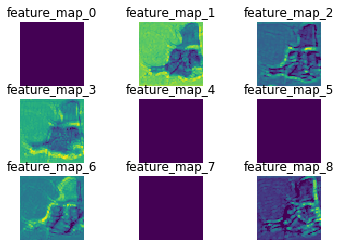

c:\python\python37\lib\site-packages\ipykernel_launcher.py:73: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (5, 5), input_shape=(256, 256,...)`


(59, 59, 9)


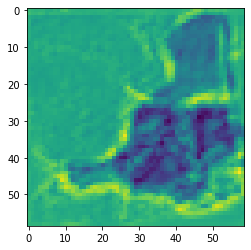

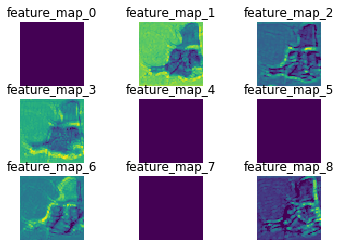

c:\python\python37\lib\site-packages\ipykernel_launcher.py:83: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (3, 3), input_shape=(256, 256,...)`


(59, 59, 9)


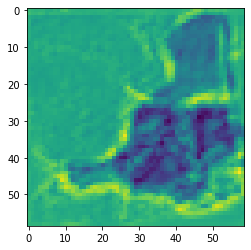

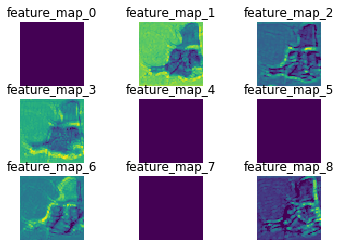

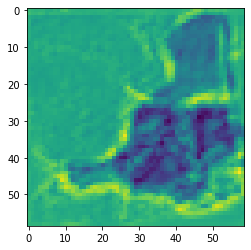

In [2]:
# coding: utf-8
 
from keras.models import Model
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation
from pylab import *
import keras

 
 
def get_row_col(num_pic):
    squr = num_pic ** 0.5
    row = round(squr)
    col = row + 1 if squr - row > 0 else row
    return row, col
 
 
def visualize_feature_map(img_batch):
    feature_map = np.squeeze(img_batch, axis=0)
    print(feature_map.shape)
 
    feature_map_combination = []
    plt.figure()
 
    num_pic = feature_map.shape[2]
    row, col = get_row_col(num_pic)
 
    for i in range(0, num_pic):
        feature_map_split = feature_map[:, :, i]
        feature_map_combination.append(feature_map_split)
        plt.subplot(row, col, i + 1)
        plt.imshow(feature_map_split)
        axis('off')
        title('feature_map_{}'.format(i))
 
    plt.savefig('feature_map.png')
    plt.show()
 
    # 各个特征图按1：1 叠加
    feature_map_sum = sum(ele for ele in feature_map_combination)
    plt.imshow(feature_map_sum)
    plt.savefig("feature_map_sum.png")
 
 
def create_model():
    model = Sequential()
 
    # 第一层CNN
    # 第一个参数是卷积核的数量，第二三个参数是卷积核的大小
    model.add(Convolution2D(9, 20, 20, input_shape=img.shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)  # conv_img 卷积结果
 
    visualize_feature_map(conv_img)

 
    # 第二层CNN
    model.add(Convolution2D(9, 10, 10, input_shape=img.shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)  # conv_img 卷积结果
 
    visualize_feature_map(conv_img)

 
    # 第三层CNN
    model.add(Convolution2D(9, 5, 5, input_shape=img.shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)  # conv_img 卷积结果
 
    visualize_feature_map(conv_img)

 
    # 第四层CNN
    model.add(Convolution2D(9, 3, 3, input_shape=img.shape))
    model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
 
    return model
 
 
if __name__ == "__main__":
    im1 = cv2.imread('../input/Pic/example.png')
    cv2.imshow('image1', im1)
    img = cv2.resize(im1, (256,256), interpolation=cv2.INTER_CUBIC)
 
    model = create_model()
 
    img_batch = np.expand_dims(img, axis=0)
    conv_img = model.predict(img_batch)  # conv_img 卷积结果
 
    visualize_feature_map(conv_img)
